# Uncovering the Kaggle Monetary Competitions Landscape: A Metadata Analysis

In [93]:
# Tools
import pandas as pd
import plotly.express as px
from scipy.stats import normaltest
import numpy as np
import seaborn as sns

In [94]:
# Data
path_data = "/Users/carlosgarcia/Documents/DS Projects/Kaggle Competion Winners Analysis/Part 2/Kaggle_monetary_competitions_cleaned.csv"
competitions_meta = pd.read_csv(path_data, parse_dates=["deadline_estimate"])

## What is the distribution of reward offered in the competitions?

In [95]:
fig = px.ecdf(
    competitions_meta,
    x="reward",
    height=500,
    width=500,
    marginal="histogram",
    title="Reward Distribution",
)
fig.show()

In [96]:
print(normaltest(competitions_meta.reward.values))  # reward is not normally distributed

NormaltestResult(statistic=572.0004804234853, pvalue=6.189760611433459e-125)


In [97]:
iqr_quantiles = np.quantile(competitions_meta.reward.values, [0.25, 0.75])
upper_fence = (iqr_quantiles[1] - iqr_quantiles[0]) * 1.5 + iqr_quantiles[1]

In [98]:
# Statistical outliers via IQR method
competitions_meta[competitions_meta.reward > upper_fence].sort_values(
    "reward", ascending=False
)

,title,title_url,description,reward,category,teams_participated,deadline_estimate
177,Passenger Screening Algorithm Challenge,https://www.kaggle.com/competitions/passenger-...,Improve the accuracy of the Department of Home...,1500000.0,Featured,518,2018-01-19 20:13:51
173,Zillow Prize: Zillow’s Home Value Prediction (...,https://www.kaggle.com/competitions/zillow-pri...,Can you improve the algorithm that changed the...,1200000.0,Featured,3770,2018-01-19 20:13:51
194,Data Science Bowl 2017,https://www.kaggle.com/competitions/data-scien...,Can you improve lung cancer detection?,1000000.0,Featured,1972,2017-01-19 20:13:51
92,Deepfake Detection Challenge,https://www.kaggle.com/competitions/deepfake-d...,Identify videos with facial or voice manipulat...,1000000.0,Featured Code Competition,2265,2020-01-19 20:13:51
306,Heritage Health Prize,https://www.kaggle.com/competitions/hhp,Identify patients who will be admitted to a ho...,500000.0,Featured,1350,2013-01-19 20:13:51
286,"Flight Quest 2: Flight Optimization, Milestone...",https://www.kaggle.com/competitions/flight2-mi...,Optimize flight routes based on current weathe...,250000.0,GE Quests,129,2014-01-19 20:13:51
309,GE Flight Quest,https://www.kaggle.com/competitions/flight,Think you can change the future of flight?,250000.0,GE Quests,172,2013-01-19 20:13:51
271,"Flight Quest 2: Flight Optimization, Final Phase",https://www.kaggle.com/competitions/flight2-final,Final Phase of Flight Quest 2,220000.0,GE Quests,33,2014-01-19 20:13:51
273,"Flight Quest 2: Flight Optimization, Main Phase",https://www.kaggle.com/competitions/flight2-main,Optimize flight routes based on current weathe...,220000.0,GE Quests,121,2014-01-19 20:13:51
214,Second Annual Data Science Bowl,https://www.kaggle.com/competitions/second-ann...,Transforming How We Diagnose Heart Disease,200000.0,Featured,192,2016-01-19 20:13:51


In [99]:
# Statistical outliers via visual inspection of histogram
competitions_meta[competitions_meta.reward > 250_000].sort_values(
    "reward", ascending=False
)

,title,title_url,description,reward,category,teams_participated,deadline_estimate
177,Passenger Screening Algorithm Challenge,https://www.kaggle.com/competitions/passenger-...,Improve the accuracy of the Department of Home...,1500000.0,Featured,518,2018-01-19 20:13:51
173,Zillow Prize: Zillow’s Home Value Prediction (...,https://www.kaggle.com/competitions/zillow-pri...,Can you improve the algorithm that changed the...,1200000.0,Featured,3770,2018-01-19 20:13:51
92,Deepfake Detection Challenge,https://www.kaggle.com/competitions/deepfake-d...,Identify videos with facial or voice manipulat...,1000000.0,Featured Code Competition,2265,2020-01-19 20:13:51
194,Data Science Bowl 2017,https://www.kaggle.com/competitions/data-scien...,Can you improve lung cancer detection?,1000000.0,Featured,1972,2017-01-19 20:13:51
306,Heritage Health Prize,https://www.kaggle.com/competitions/hhp,Identify patients who will be admitted to a ho...,500000.0,Featured,1350,2013-01-19 20:13:51


In [100]:
competitions_meta_v2 = competitions_meta[competitions_meta.reward < upper_fence].copy()

In [101]:
print(competitions_meta.shape)
print(competitions_meta_v2.shape)

(374, 7)
(355, 7)


## Which categories of competitions are the most popular? Are there any categories that are underrepresented? 

In [102]:
fig = px.histogram(
    competitions_meta_v2,
    x="category",
    height=500,
    width=500,
    title="Competition Categories",
    text_auto=True,
)
fig.show()

## How many teams typically participate in a competition? 

In [103]:
fig = px.histogram(
    competitions_meta_v2,
    x="teams_participated",
    height=500,
    width=500,
    marginal="box",
    title="Teams Entered in Competition Distribution",
)
fig.show()

In [104]:
# Central Tendency
competitions_meta_v2["teams_participated"].median()

632.0

## Relationship Analysis

### Are there any interesting patterns or relationships between the different columns of the data? Are there any columns that are highly correlated with each other?

In [105]:
competitions_meta_v2['deadline_estimate_year'] = competitions_meta_v2['deadline_estimate'].dt.year

In [106]:
fig = px.scatter_matrix(
    competitions_meta_v2[["reward", "teams_participated", 'deadline_estimate_year']], height=600,width=800
)
fig.show()

/opt/anaconda3/envs/Env-1-General/lib/python3.9/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



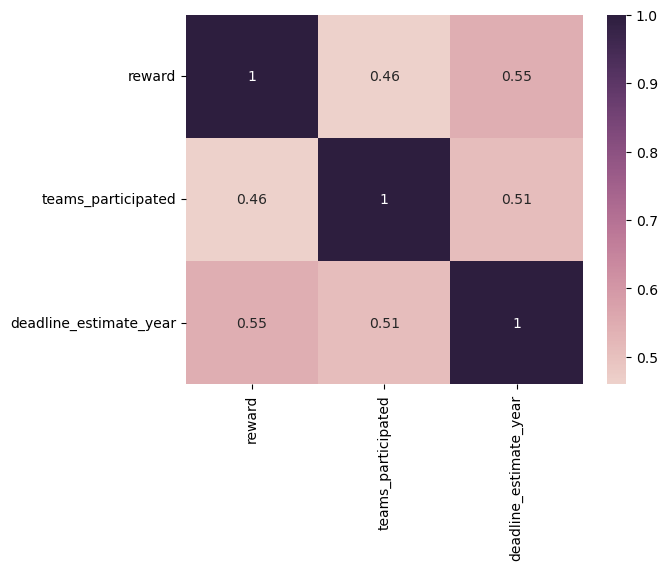

In [107]:
heatmap_fig = sns.heatmap(
    competitions_meta_v2[["reward", "teams_participated", "deadline_estimate_year"]].corr(
        method="spearman", numeric_only=False
    ),
    annot=True,
    cmap=sns.cubehelix_palette(as_cmap=True),
)

moderate relatinoship at best for variables interacting with deadline_estimate. 

## What are the main insights from the data?
- Although a moderate spearman correlation at best. Both reward and teams participated have a positive correlation. Meaning that they have been increasing overtime. 
- The three most popular competition categories are as follows: Featured> Research > Featured Code Competition
- "Data Science Bowl" appears a couple times in the statistical reward outliers list of competitions. 
- The median of teams participating in a competition with monetary reward is 632 teams. 


## Limitations in the dataset and how they were handled? 

### How accurate are the deadline estimates for the competitions?
When scraping the data for older competitions the date data format was in general "'time' ago" example: "6 years ago"
- The granuality therefore of the date in which the competition closed is limited. 
- For more information see Part 2/kaggle_competitions_metadata.py (pre-processing code)

### About the Description Column
- The description is not the full description ex: https://www.kaggle.com/competitions/santa-2022 but taken from the competition tab ex: https://www.kaggle.com/competitions?listOption=completed&prestigeFilter=money

## Further Areas of investigation:
- Are there any common themes or keywords in the titles and descriptions of the competitions? What insights can be gained from text analysis of this data? 
